In [1]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [2]:
read = emcee.backends.HDFBackend("SDP_simple_model.h5")

In [3]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.
chain = read.get_chain()   

In [4]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
best_log = np.where(log_prob == log_prob.max())
print(log_prob.max())

-165296.658354173


In [5]:
#parameters of best walker
best_walker = chain[best_log][1]

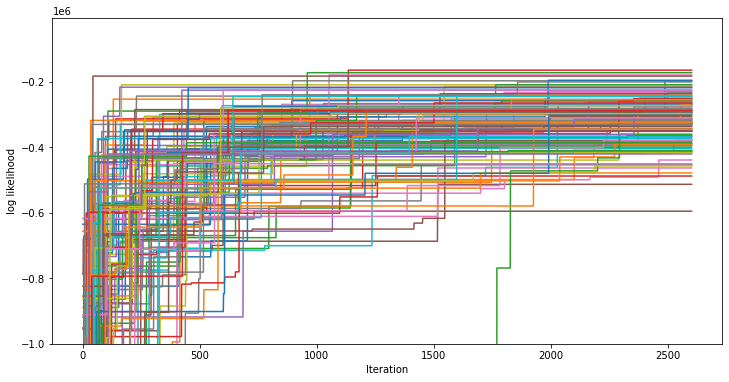

In [6]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-0.1e7, -5000)
    plt.ylabel("log likelihood")
    plt.xlabel("Iteration")

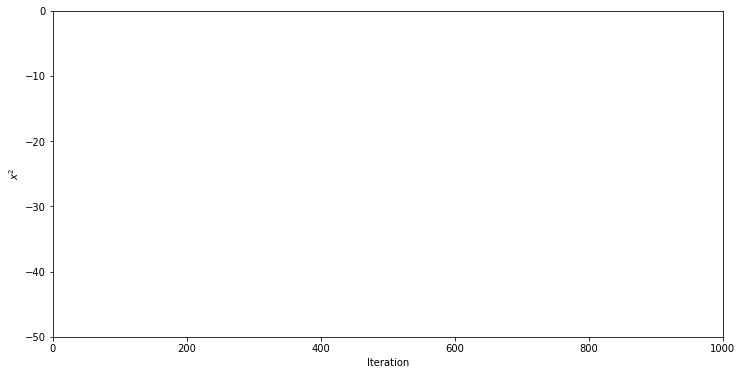

In [20]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-50, 0)
    plt.xlim(0,1000)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

In [7]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 120


array([ 4.,  3.,  8.,  6.,  9.,  4.,  4.,  6.,  5., 10.,  8.,  8.,  3.,
        4.,  8.,  8.,  9.,  9.,  6., 11., 10.,  7.,  6.,  6.,  3., 13.,
        5.,  7.,  6., 10.,  6.,  9., 11.,  3.,  7.,  6.,  7.,  4.,  6.,
        8., 12.,  7., 14., 13.,  4.,  5.,  6., 11., 12.,  9.,  2.,  7.,
        3.,  4.,  7.,  6.,  5.,  6.,  5.,  8.,  7.,  3.,  6., 15.,  4.,
        7.,  2.,  8.,  9.,  3.,  6.,  2.,  8.,  9.,  9.,  7.,  7.,  2.,
        6.,  3.,  4.,  9.,  7., 13.,  5.,  2.,  4.,  1.,  7.,  7.,  8.,
        6., 11.,  5.,  9.,  6.,  8.,  4.,  6.,  6., 12.,  5.,  2.,  6.,
        7.,  5.,  5.,  8.,  9.,  6.,  7., 10.,  8.,  5.,  2.,  9.,  7.,
        6.,  9.,  5.])

[213.74461562 245.92412867 252.73299252 257.11583404 252.2662354
 245.63659916 251.63202301 248.09344638 245.37137814]
flat chain shape: (312240, 9)
flat log prob shape: (312240,)


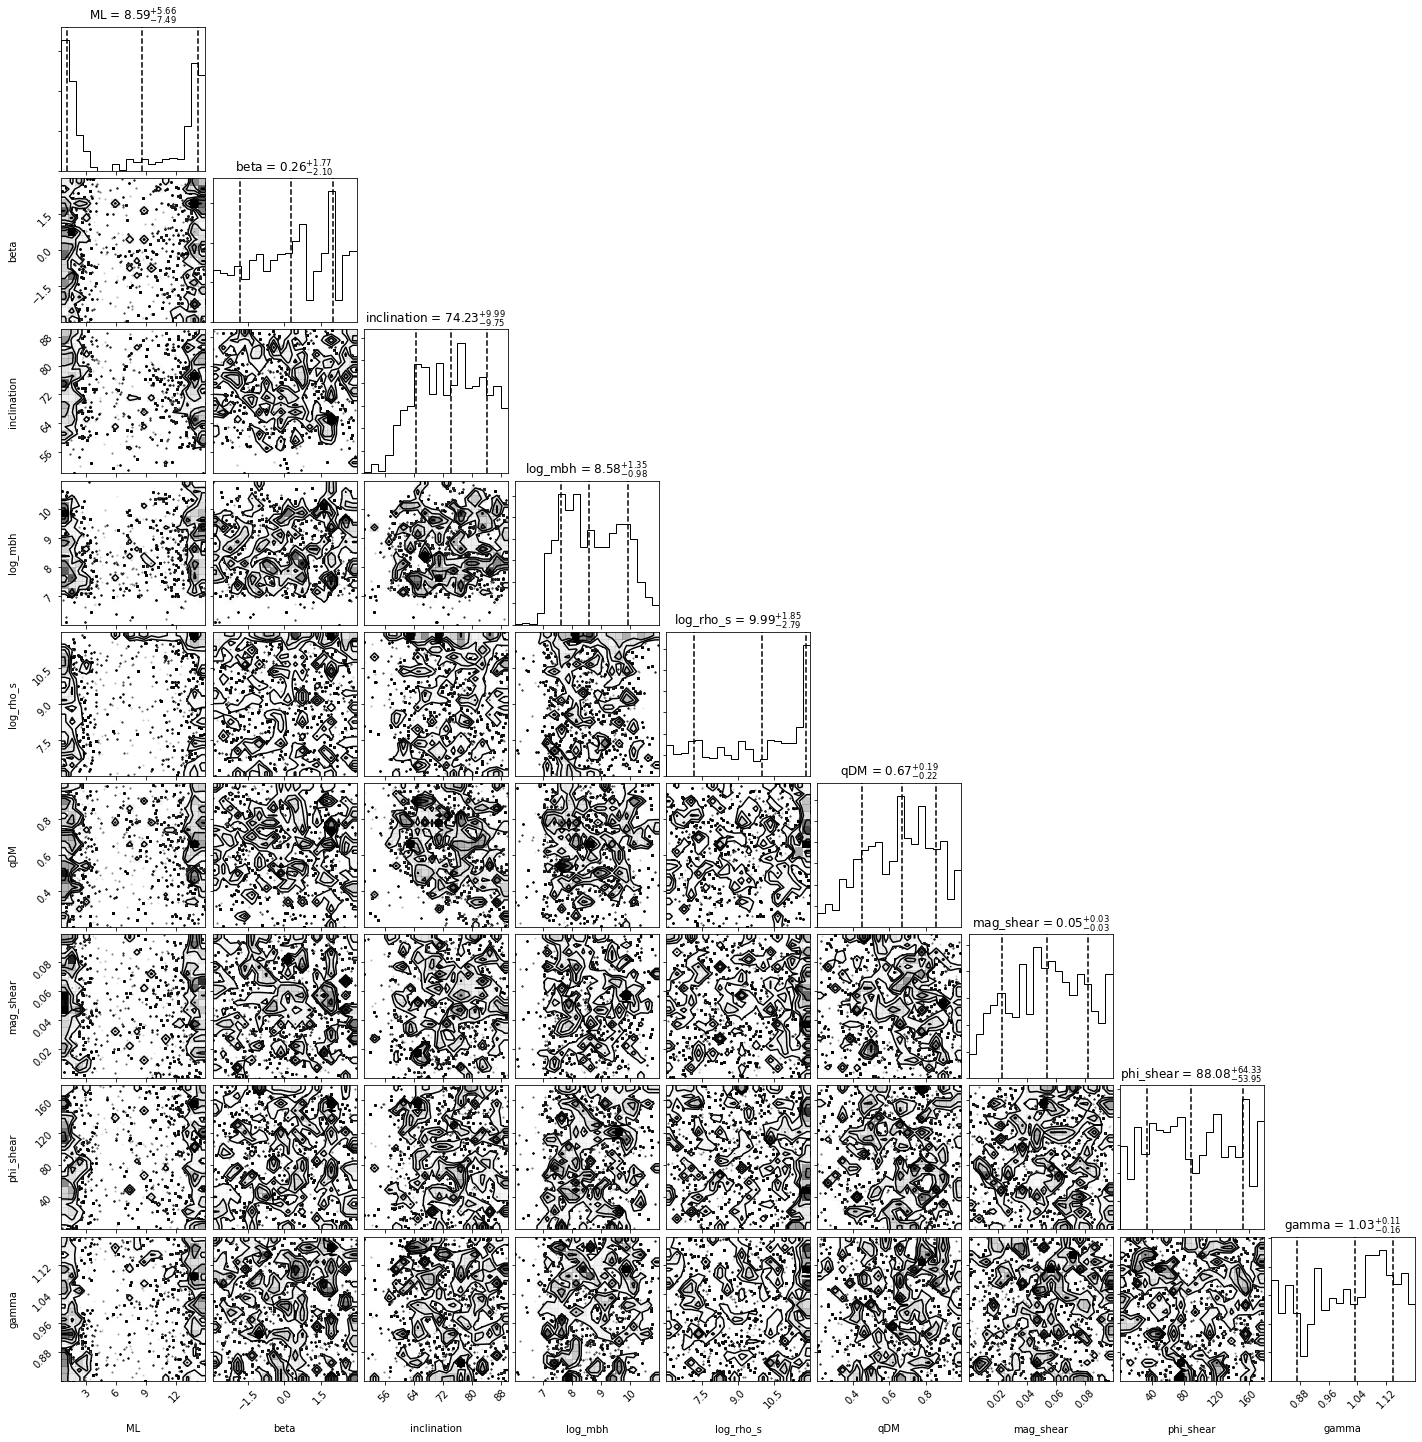

In [8]:
#Corner plots

labels = ["ML", "beta", "inclination", "log_mbh", "log_rho_s", "qDM", "mag_shear", "phi_shear", "gamma"]


tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(flat=True)
log_prob_samples = read.get_log_prob(flat=True)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

514 128
flat chain shape: (1920, 9)
flat log prob shape: (1920,)


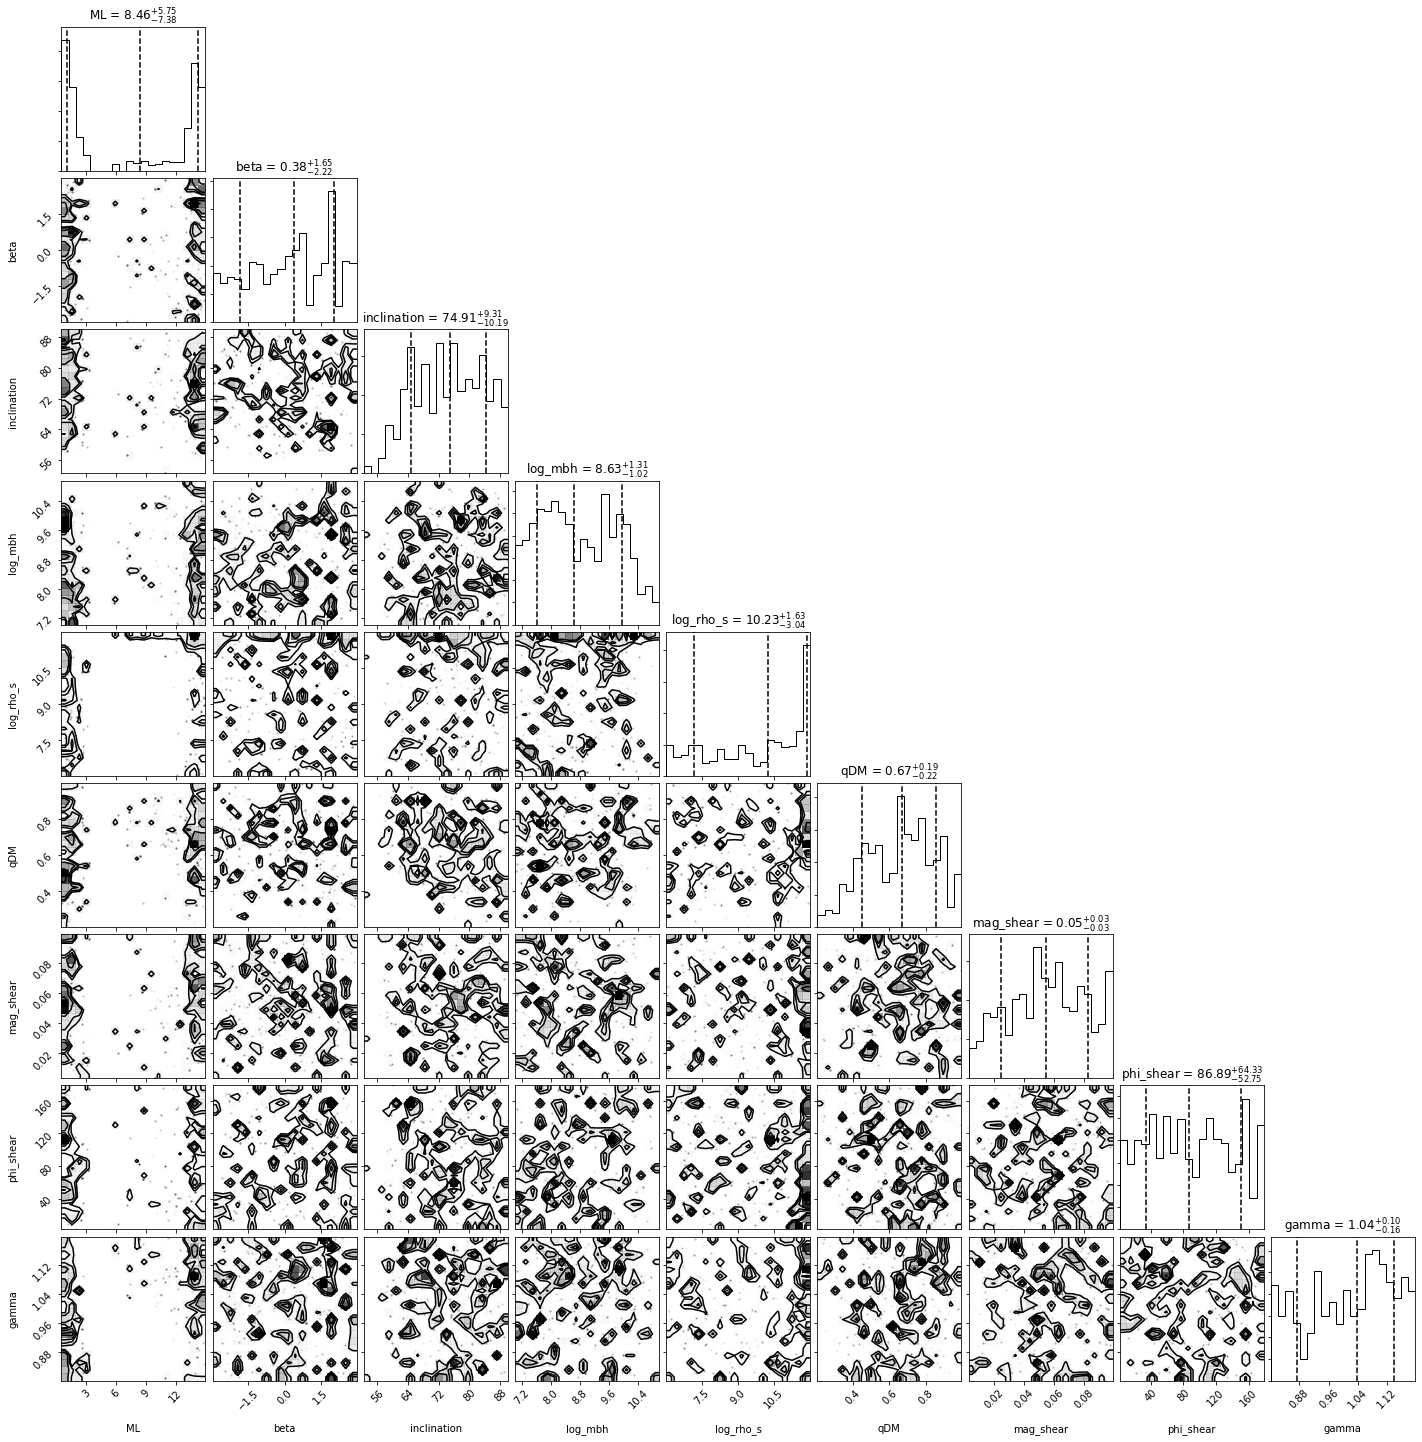

In [9]:
#Corner plots

tau = read.get_autocorr_time(tol=0)
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.max(tau))
print(burnin, thin)

labels =["ML", "beta", "inclination", "log_mbh", "log_rho_s", "qDM", "mag_shear", "phi_shear", "gamma"]


samples = read.get_chain(discard=burnin, flat=True,thin=thin )
log_prob_samples = read.get_log_prob(discard=burnin,flat=True,thin=thin)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

In [10]:
from IPython.display import display, Math
best_fit = np.zeros(len(labels)-1)

for i in range(9):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    best_fit[i] = mcmc[1]
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [16]:
tau = read.get_autocorr_time()
tau

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 9 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 98;
tau: [486.31803393 459.28338693 456.9947822  456.8329173  458.93581801
 443.51325637 452.59124965 449.4420879  461.08392454]

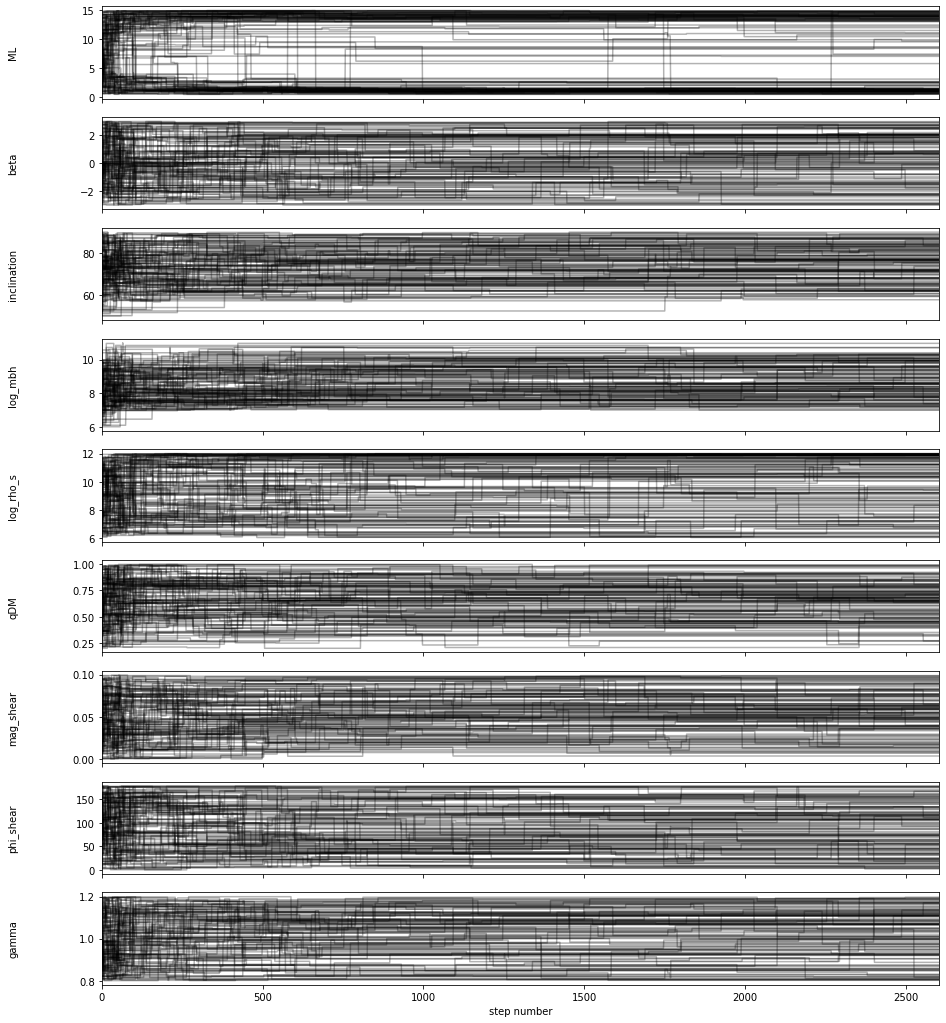

In [11]:
#Walke of each walker
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)-1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)


axes[-1].set_xlabel("step number");

In [18]:
it, accep_tot, time, accep_100 = np.loadtxt("Output_LogFile.txt", unpack=True)

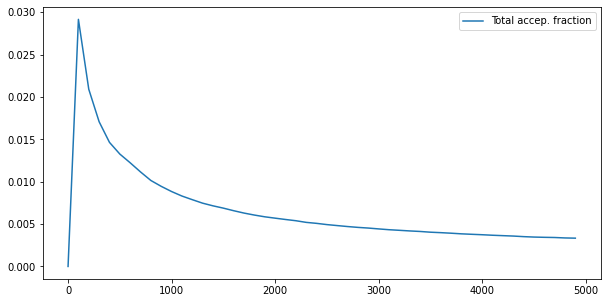

In [19]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.legend()

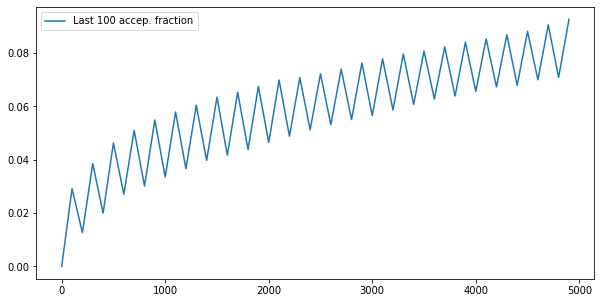

In [21]:
#Plot accep_100 vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100 accep. fraction")
#plt.ylim(0.15,)
plt.legend()

## Plot Model Best-Fit

In [1]:
#General packages
import numpy as np
from My_Jampy import JAM
import emcee

#MPI
from schwimmbad import MPIPool

#Constants and usefull packages
from astropy.cosmology import Planck15 as cosmo
from astropy.constants import G, M_sun, c
import astropy.units as u

#Autolens Model packages
import autolens as al
import autolens.plot as aplt

#Combined Model package
import CombinedModel

#Useful constants
metre2Mpc = (1*u.m).to(u.Mpc)/u.m           #Constant factor to convert metre to Mpc.
kg2Msun = (1*u.kg/M_sun)*u.solMass/u.kg     #Constant factor to convert kg to Msun

G_Mpc = G*(metre2Mpc)**3/kg2Msun            #Gravitational constant in Mpc³/(Msun s²)
c_Mpc = c*metre2Mpc                         #Speed of light in Mpc/s


#Dataset path
data_folder = "/home/carlos/Documents/GitHub/Master-Degree/SDP81/Autolens/New_models/Data/"



In [2]:
def run():
    #Reading MGE inputs
                #attention to units
    surf_lum, sigma_lum, qobs_lum = np.loadtxt(data_folder+"JAM_Input.txt", unpack=True)       #MGE decomposition
    surf_dm, sigma_dm , qobs_dm   = np.loadtxt(data_folder+"SDP81_pseudo-DM.txt", unpack=True) #DM component
    norm_psf, sigma_psf           = np.loadtxt(data_folder+"MUSE_Psf_model.txt", unpack=True)  #PSF
    ybin, xbin, vrms, erms        = np.loadtxt(data_folder+"pPXF_rot_data.txt", unpack=True)   #Vrms data

    muse_pixsize = 0.2                                  #Muse pixel size [arcsec/px]

    z_lens   = 0.299                                    #Lens redshifth
    z_source = 3.042                                    #Source redshift

    #Angular diameter distances
    D_l = cosmo.angular_diameter_distance(z_lens)                   #Lens              
    D_s = cosmo.angular_diameter_distance(z_source)                 #Source
    D_ls = cosmo.angular_diameter_distance_z1z2(z_lens, z_source)   #Lens to source

    ## Models inicialization

    """
        To inicialize the model, we set some random values for the parameters. But it's only necessary for initialize the model. During the non-linear search, this values will be updated constantly until the best fit.
    """  


    #This quantities are our unknown parameters
    inc       = 75                              #Inclination [deg]
    mbh       = 1e10                            #Mass of black hole [M_sun]
    beta      = np.full_like(surf_lum, 0.3)     #Anisotropy
    ml        = 10                              #Mass to light ratio [M_sun/L_sun]
    mag_shear = 0.01                            #Shear magnitude
    phi_shear = 100.0                           #Shear angle
    rho_s     = 1e10                            #dark matter intensity
    qdm       = np.full_like(qobs_dm, 0.5)      #dark matter axial ratio
    gamma     = 1.0                             #Gamma
    #--------------------------------------------------------------------------------------------------#
    # JAMPY MODEL

    Jam_model = JAM(ybin=ybin * muse_pixsize, xbin=xbin * muse_pixsize, inc=inc, distance=D_l.value,
                     mbh=mbh, beta=beta, rms=vrms, erms=erms, normpsf=norm_psf, 
                     sigmapsf=sigma_psf * muse_pixsize, pixsize=muse_pixsize)

        #Add Luminosity component
    Jam_model.luminosity_component(surf_lum=surf_lum, sigma_lum=sigma_lum,
                                    qobs_lum=qobs_lum, ml=ml)
        #Add DM component
    Jam_model.DM_component(surf_dm=rho_s * surf_dm, sigma_dm=sigma_dm, qobs_dm=qdm)
    #--------------------------------------------------------------------------------------------------#
    # PYAUTOLENS MODEL

    imaging = al.Imaging.from_fits(
        image_path=f"{data_folder}/ALMA_resampled.fits",
        noise_map_path=f"{data_folder}/ALMA_rms_noise_map.fits",
        psf_path=f"{data_folder}/alma_psf.fits",
        pixel_scales=0.01,
        image_hdu=1, noise_map_hdu=1
    )

    mask_custom = al.Mask.from_fits(
        file_path=f"{data_folder}mask2.fits", pixel_scales=imaging.pixel_scales
    )

    masked_imaging = al.MaskedImaging(imaging=imaging, mask=mask_custom)

    mass_profile = al.mp.MGE()

        #Components
    mass_profile.MGE_comps(z_l=z_lens, z_s=z_source, 
                       surf_lum=surf_lum, sigma_lum=sigma_lum, qobs_lum=qobs_lum, ml=ml,
                       mbh=mbh, surf_dm =rho_s * surf_dm, sigma_dm=sigma_dm, qobs_dm=qdm)
    #--------------------------------------------------------------------------------------------------#
    # COMBINED MODEL

        #Just remembering, by default the model does not include dark matter.
    model = CombinedModel.Models(Jampy_model=Jam_model, mass_profile=mass_profile,
                                 masked_imaging=masked_imaging, quiet=False)

    model.mass_to_light(ml_kind='scalar')               #Setting gradient ML
    model.beta(beta_kind='scalar')                      #Seting vector anisotropy
    model.has_DM(a=True,filename=data_folder+"SDP81_pseudo-DM.txt") #Setting Dark matter component
    #--------------------------------------------------------------------------------------------------#
    return model

In [4]:
model = run()
ML  10.22
beta  0.01
inclination  87.05
log_mbh  7.04
log_rho_s  10.96
qDM  0.90

8.716e+10


## Best Model

In [5]:
p0 = np.array([10.22, 0.01,  87.05,  7.04,
        10.96,   0.90,  8.23502313e-02,  8.66334317e+01,
        1.03901847e+00])

In [6]:
p0 = best_fit

NameError: name 'best_fit' is not defined

ParsDic {'ml': 10.22, 'beta': 0.01, 'inc': 87.05, 'log_mbh': 7.04, 'log_rho_s': 10.96, 'qDM': 0.9, 'mag_shear': 0.0823502313, 'phi_shear': 86.6334317, 'gamma': 1.03901847}
jam_axi_rms elapsed time sec: 0.52
inc=87.0 beta_z=0.01 M/L=1 BH=1.10e+07 chi2/DOF=113
Total mass MGE: 2.624e+12


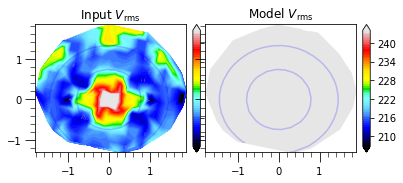

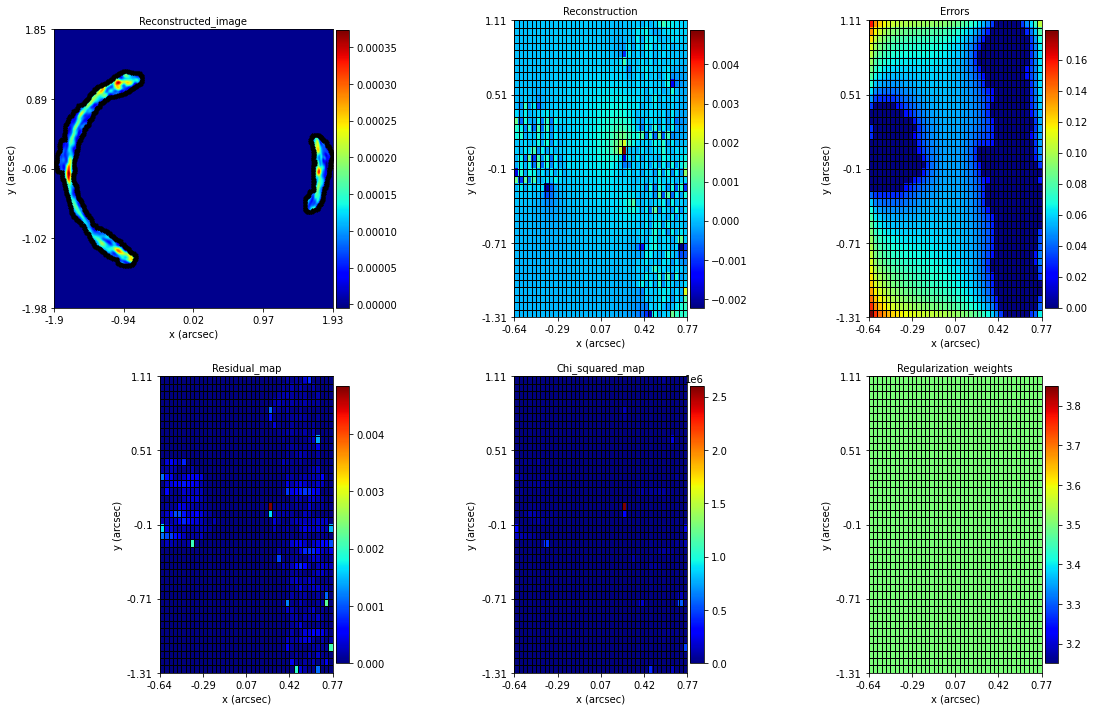

-5562540.802815904

In [7]:
model(p0)

## Best likelihood

In [17]:
85356.1

p0 = best_walker

ParsDic {'ml': 12.493043754400416, 'beta': -2.5830672751152166, 'inc': 67.5510753002216, 'log_mbh': 9.392075033496921, 'log_rho_s': 11.980130006083241, 'qDM': 0.8931291955247164, 'mag_shear': 0.03942665788844689, 'phi_shear': 96.00389249166837, 'gamma': 1.0755784938811448}
jam_axi_rms elapsed time sec: 0.36
inc=67.6 beta_z=-2.58 M/L=1 BH=2.47e+09 chi2/DOF=229
Total mass MGE: 1.911e+13


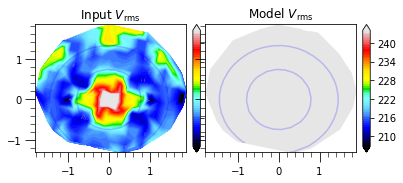

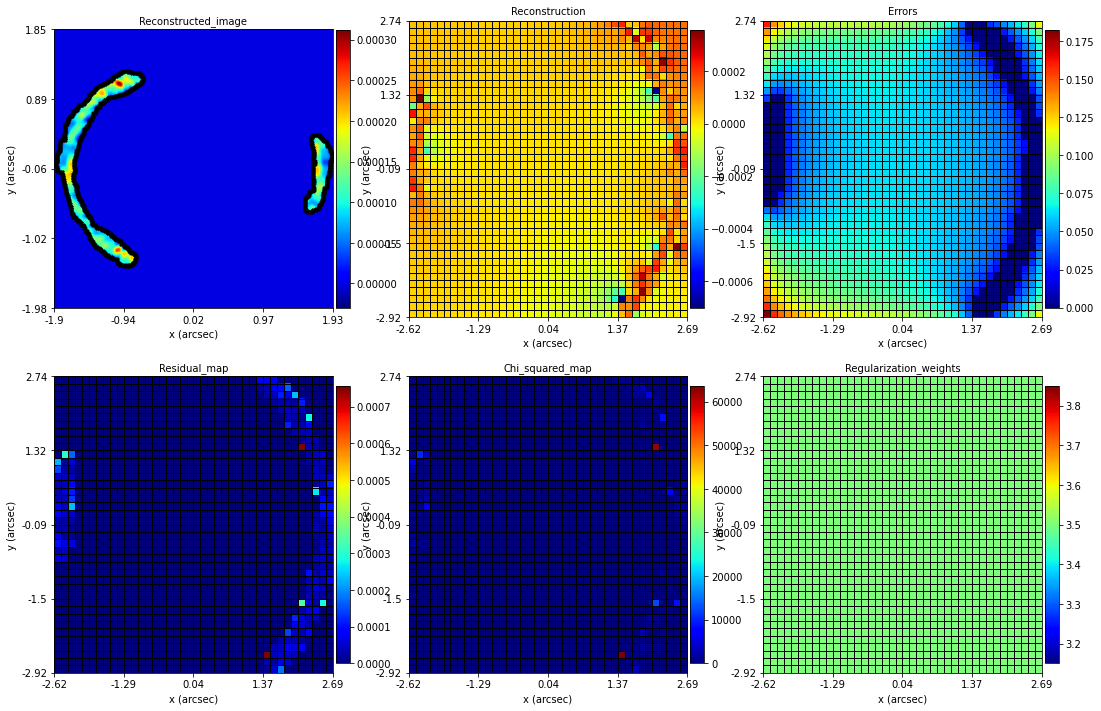

-165295.52735663985

In [18]:
model(p0)